In [3]:
#Check current directory
%pwd

'/Users/keshia/Desktop/UT Boot Camp/Mouse Challenge'

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats

# Study data files
mouse_metadata_path = "/Users/keshia/Desktop/UT Boot Camp/Mouse Challenge/Mouse_metadata.csv"
study_results_path = "/Users/keshia/Desktop/UT Boot Camp/Mouse Challenge/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(mouse_metadata, study_results, on='Mouse ID', how='outer')

# Display the data table for preview
print(combined_data.head(15))

   Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
0      k403     Ramicane    Male          21          16          0   
1      k403     Ramicane    Male          21          16          5   
2      k403     Ramicane    Male          21          16         10   
3      k403     Ramicane    Male          21          16         15   
4      k403     Ramicane    Male          21          16         20   
5      k403     Ramicane    Male          21          16         25   
6      k403     Ramicane    Male          21          16         30   
7      k403     Ramicane    Male          21          16         35   
8      k403     Ramicane    Male          21          16         40   
9      k403     Ramicane    Male          21          16         45   
10     s185    Capomulin  Female           3          17          0   
11     s185    Capomulin  Female           3          17          5   
12     s185    Capomulin  Female           3          17         10   
13    

In [8]:
# Checking the number of mice.
total=combined_data['Mouse ID'].nunique()
total

249

In [9]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_data[combined_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
duplicate_mice_ids = duplicate_mice['Mouse ID'].unique()
print("Duplicate mice IDs:", duplicate_mice_ids)

#For me, count number of duplicate mice id g989
duplicate_mouse_g989 = duplicate_mice[duplicate_mice['Mouse ID'] == 'g989']
num_duplicates_g989 = len(duplicate_mouse_g989)
print("Number of duplicate occurrences of mouse ID 'g989':", num_duplicates_g989)

Duplicate mice IDs: ['g989']
Number of duplicate occurrences of mouse ID 'g989': 10


In [10]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_data = combined_data[combined_data['Mouse ID'].isin(duplicate_mice_ids)]
print(duplicate_mouse_data)

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   
918     g989     Propriva  Female          21          26         25   
919     g989     Propriva  Female          21          26         30   
920     g989     Propriva  Female          21          26       

In [11]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# Create a clean DataFrame by dropping the duplicate mouse by its ID
cleaned_data = combined_data.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep='first')


In [12]:
# Checking the number of mice in the clean DataFrame.
num_mice_cleaned = cleaned_data['Mouse ID'].nunique()
print("Number of unique mice in cleaned data:", num_mice_cleaned)

Number of unique mice in cleaned data: 249


## Summary Statistics

In [13]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

# Group by 'Drug Regimen'
grouped_data = cleaned_data.groupby('Drug Regimen')

#Statistics for each group
mean = grouped_data['Tumor Volume (mm3)'].mean()
median = grouped_data['Tumor Volume (mm3)'].median()
variance = grouped_data['Tumor Volume (mm3)'].var()
std_deviation = grouped_data['Tumor Volume (mm3)'].std()
sem = grouped_data['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary DataFrame
summary_stats = pd.DataFrame({
    'Mean': mean,
    'Median': median,
    'Variance': variance,
    'Standard Deviation': std_deviation,
    'SEM': sem})

# Display summary
print(summary_stats)

                   Mean     Median   Variance  Standard Deviation       SEM
Drug Regimen                                                               
Capomulin     40.675741  41.557809  24.947764            4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177            6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684            6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577            8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479            8.134708  0.596466
Placebo       54.033581  52.288934  61.168083            7.821003  0.581331
Propriva      52.393463  50.909965  43.138803            6.568014  0.525862
Ramicane      40.216745  40.673236  23.486704            4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562            7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355            6.966589  0.516398


In [14]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


# Generate summary statistics table using a single line with aggregation method
summary_stats = cleaned_data.groupby('Drug Regimen').agg({'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']})

# Rename the columns for clarity
summary_stats.columns = ['Mean', 'Median', 'Variance', 'Standard Deviation', 'SEM']

# Display summary
print(summary_stats)


                   Mean     Median   Variance  Standard Deviation       SEM
Drug Regimen                                                               
Capomulin     40.675741  41.557809  24.947764            4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177            6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684            6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577            8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479            8.134708  0.596466
Placebo       54.033581  52.288934  61.168083            7.821003  0.581331
Propriva      52.393463  50.909965  43.138803            6.568014  0.525862
Ramicane      40.216745  40.673236  23.486704            4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562            7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355            6.966589  0.516398


## Bar and Pie Charts

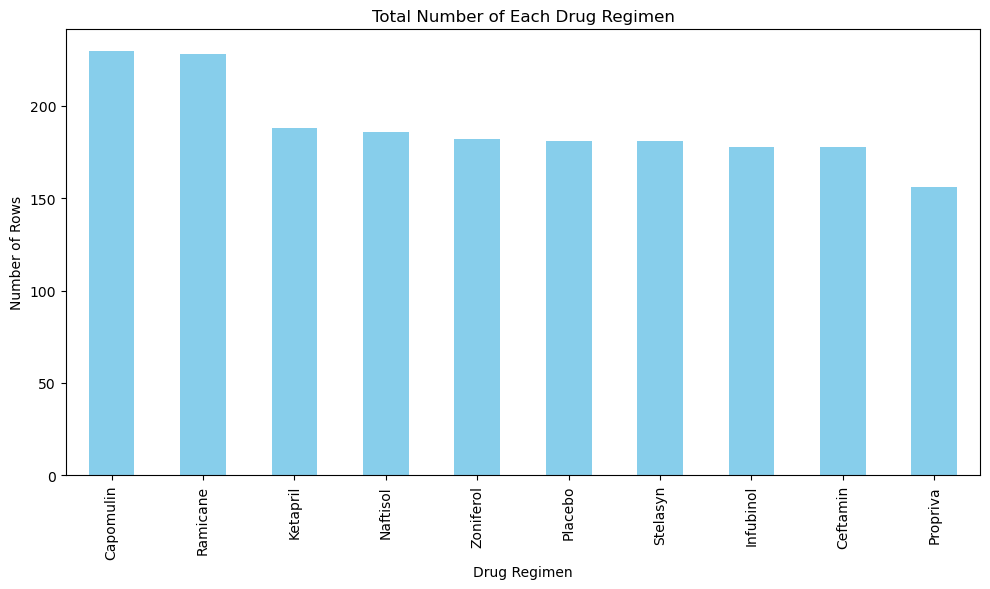

In [15]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

# Count the number of rows for each drug regimen
drug_counts = cleaned_data['Drug Regimen'].value_counts()

# Plot the bar plot
drug_counts.plot(kind='bar', figsize=(10, 6), color='skyblue')

# Set the title and labels
plt.title('Total Number of Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows')

# Display
plt.tight_layout()
plt.show()

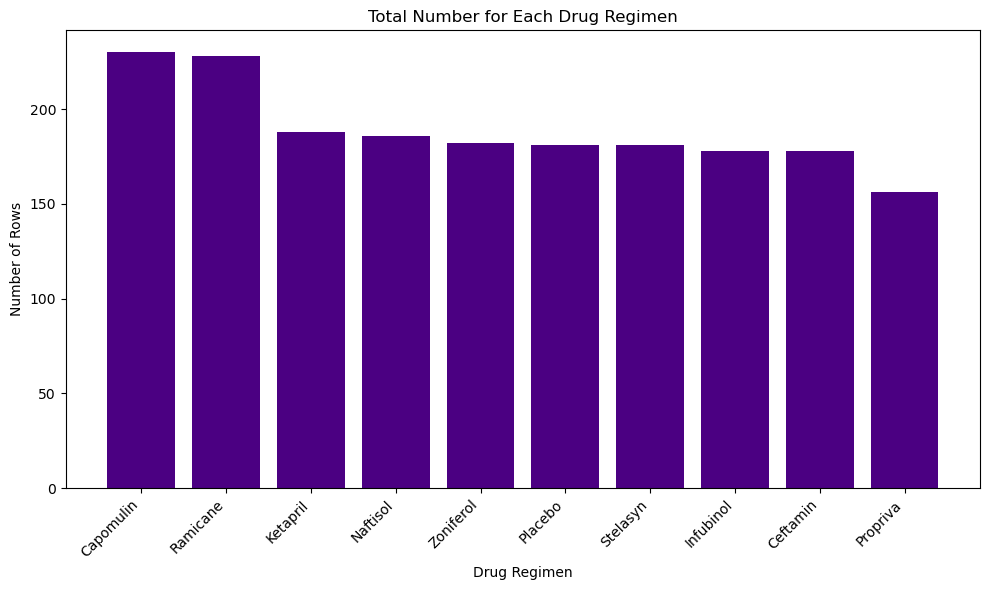

In [16]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.


# Count the number of rows for each drug regimen
drug_counts = cleaned_data['Drug Regimen'].value_counts()

# Get the drug regimens and their corresponding counts
drug_regimens = drug_counts.index
counts = drug_counts.values

# Plot the bar plot
plt.figure(figsize=(10, 6))
plt.bar(drug_regimens, counts, color='indigo')

# Set the title and labels
plt.title('Total Number for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display
plt.tight_layout()
plt.show()

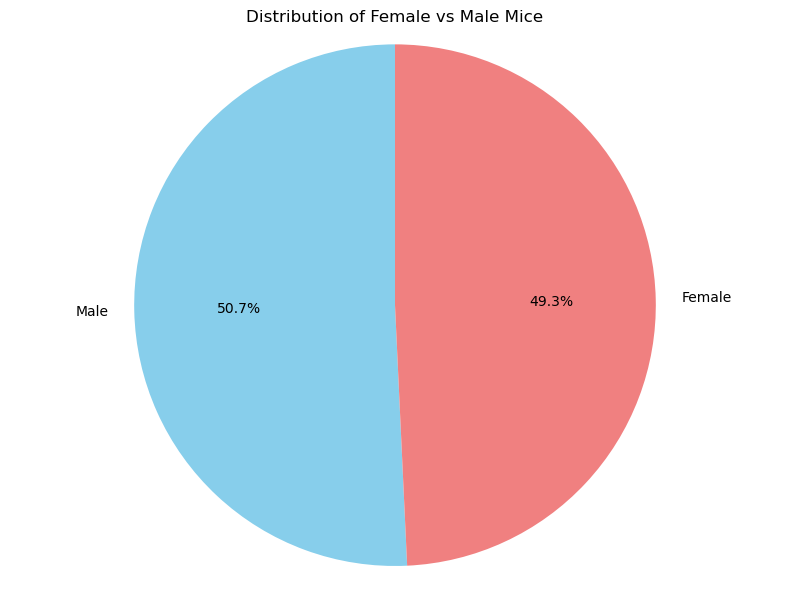

In [25]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas


# Count the number of female and male mice
gender_counts = cleaned_data['Sex'].value_counts()

# Plot the pie plot
gender_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, figsize=(8, 6), colors=['skyblue', 'lightcoral'])

# Set the title and labels
plt.title('Distribution of Female vs Male Mice')
plt.ylabel('')

# Show the plot
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.tight_layout()
plt.show()

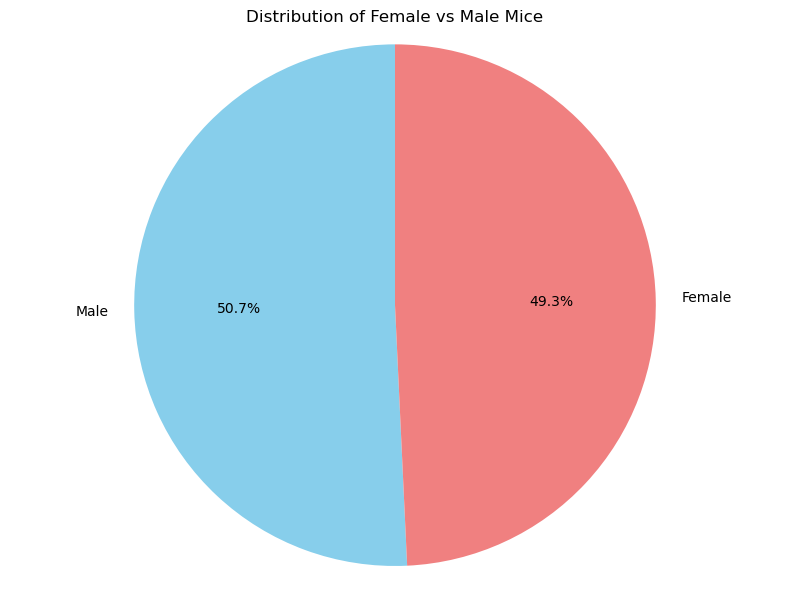

In [26]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot


# Count the number of female and male mice
gender_counts = cleaned_data['Sex'].value_counts()

# Plot the pie chart with rotation to center the data
plt.figure(figsize=(8, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])

# Set the title
plt.title('Distribution of Female vs Male Mice')

# Show the plot
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.tight_layout()
plt.show()

## Quartiles, Outliers and Boxplots

In [27]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = cleaned_data.groupby('Mouse ID')['Timepoint'].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume = pd.merge(last_timepoint, cleaned_data, on=['Mouse ID', 'Timepoint'], how='inner')

# Capomulin, Ramicane, Infubinol, and Ceftamin
treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
final_tumor_volume = final_tumor_volume[final_tumor_volume['Drug Regimen'].isin(treatment_regimens)]

#Print
print(final_tumor_volume)


    Mouse ID  Timepoint Drug Regimen     Sex  Age_months  Weight (g)  \
0       a203         45    Infubinol  Female          20          23   
1       a251         45    Infubinol  Female          21          25   
3       a275         45     Ceftamin  Female          20          28   
6       a411         45     Ramicane    Male           3          22   
7       a444         45     Ramicane  Female          10          25   
..       ...        ...          ...     ...         ...         ...   
239     y769         45     Ceftamin  Female           6          27   
240     y793         45    Capomulin    Male          17          17   
241     y865         45     Ceftamin    Male          23          26   
245     z578         45     Ramicane    Male          11          16   
246     z581         45    Infubinol  Female          24          25   

     Tumor Volume (mm3)  Metastatic Sites  
0             67.973419                 2  
1             65.525743                 1  
3  

In [29]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol = final_tumor_volume.loc[final_tumor_volume['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    
    # Add tumor volume data to the list
    tumor_vol_data.append(tumor_vol)
    
    # Calculate the quartiles and IQR
    quartiles = tumor_vol.quantile([0.25, 0.5, 0.75])
    lower_q = quartiles[0.25]
    upper_q = quartiles[0.75]
    iqr = upper_q - lower_q
    
    # Determine outliers using upper and lower bounds
    lower_bound = lower_q - 1.5 * iqr
    upper_bound = upper_q + 1.5 * iqr
    outliers = tumor_vol.loc[(tumor_vol < lower_bound) | (tumor_vol > upper_bound)]
    
    # Print information about potential outliers
    print(f"{treatment}'s potential outliers: {outliers}")
    

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


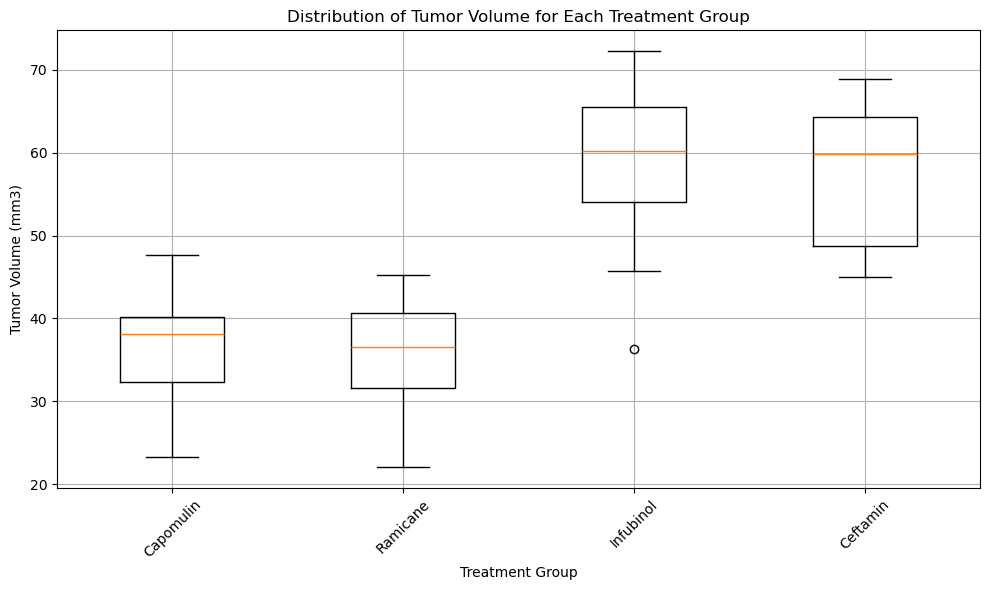

In [30]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

# Create boxplot
plt.figure(figsize=(10, 6))
plt.boxplot(tumor_vol_data, labels=treatments)

# Set labels and title
plt.title('Distribution of Tumor Volume for Each Treatment Group')
plt.xlabel('Treatment Group')
plt.ylabel('Tumor Volume (mm3)')

# Show plot
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

## Line and Scatter Plots

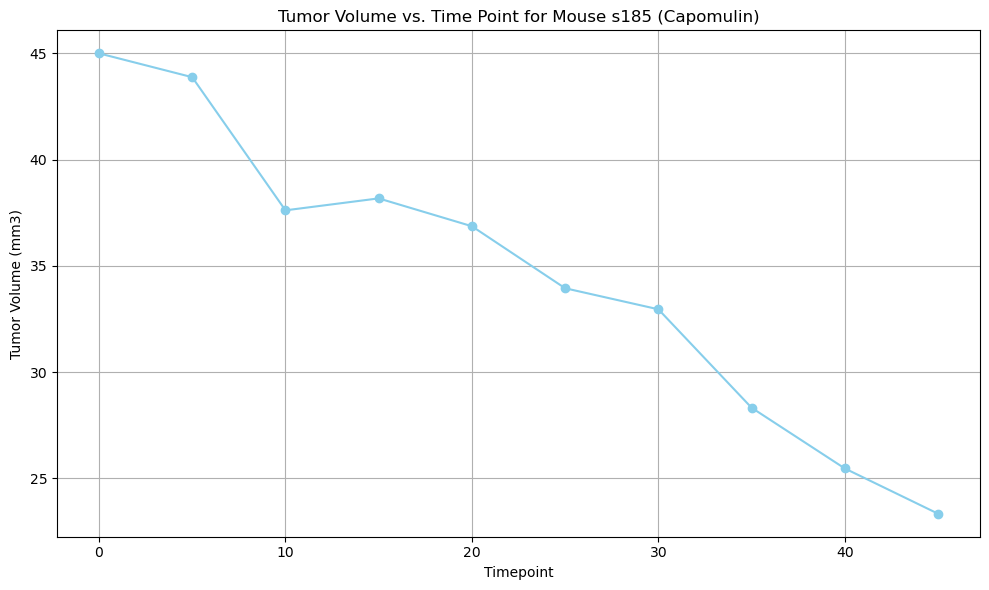

In [31]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

# Step 1: Filter the data for mice treated with Capomulin
capomulin_data = cleaned_data[cleaned_data['Drug Regimen'] == 'Capomulin']

# Step 2: Choose a single mouse ID treated with Capomulin
mouse_id = 's185'  # Example mouse ID, you can choose any mouse ID from the filtered data

# Filter the data for the selected mouse ID
mouse_data = capomulin_data[capomulin_data['Mouse ID'] == mouse_id]

# Step 3: Plot tumor volume vs. time point for the selected mouse
plt.figure(figsize=(10, 6))
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'], marker='o', color='skyblue')

# Set labels and title
plt.title(f'Tumor Volume vs. Time Point for Mouse {mouse_id} (Capomulin)')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')

# Show grid
plt.grid(True)

# Show plot
plt.tight_layout()
plt.show()


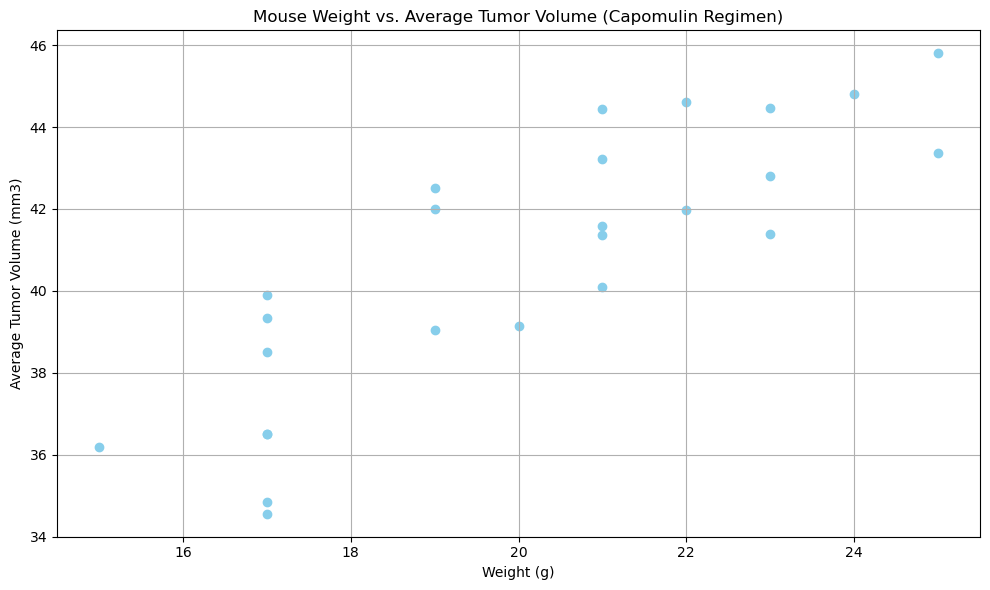

In [32]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# Step 1: Filter the data for mice treated with Capomulin
capomulin_data = cleaned_data[cleaned_data['Drug Regimen'] == 'Capomulin']

# Step 2: Group the filtered data by mouse ID and calculate the average tumor volume for each mouse
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Step 3: Merge the average tumor volume data with the mouse weight data
capomulin_weights = pd.merge(average_tumor_volume, mouse_metadata, on='Mouse ID')

# Step 4: Plot mouse weight vs. the average observed tumor volume
plt.figure(figsize=(10, 6))
plt.scatter(capomulin_weights['Weight (g)'], capomulin_weights['Tumor Volume (mm3)'], color='skyblue')

# Set labels and title
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Show grid
plt.grid(True)

# Show plot
plt.tight_layout()
plt.show()

## Correlation and Regression

Correlation Coefficient: 0.841936342469472


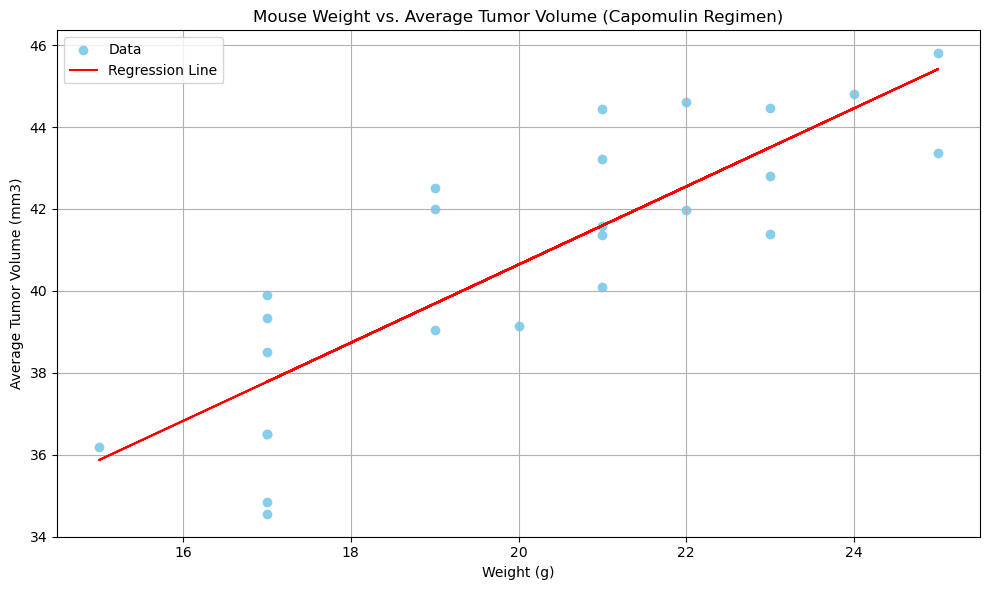

In [37]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# Step 1: Calculate the correlation coefficient
correlation_coefficient, p_value = stats.pearsonr(capomulin_weights['Weight (g)'], capomulin_weights['Tumor Volume (mm3)'])
print(f'Correlation Coefficient: {correlation_coefficient}')

# Step 2: Perform linear regression analysis
slope, intercept, r_value, p_value, std_err = stats.linregress(capomulin_weights['Weight (g)'], capomulin_weights['Tumor Volume (mm3)'])

# Step 3: Plot the regression line
plt.figure(figsize=(10, 6))
plt.scatter(capomulin_weights['Weight (g)'], capomulin_weights['Tumor Volume (mm3)'], color='skyblue', label='Data')
plt.plot(capomulin_weights['Weight (g)'], slope * capomulin_weights['Weight (g)'] + intercept, color='red', label='Regression Line')

# Set labels and title
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Show legend and grid
plt.legend()
plt.grid(True)

# Show plot
plt.tight_layout()
plt.show()
